In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.model_selection as cv
import sklearn.grid_search as gs
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\santosh\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\santosh\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
PMEMO = pd.read_csv('PMEMO_XY.csv',header=None)
# musicId, Valence, Arousal, 6373 features for each row

In [6]:
PMEMO.head()

,0,1,2,3,4,5,6,7,8,9,...,6366,6367,6368,6369,6370,6371,6372,6373,6374,6375
0,1,0.5750,0.4000,7.3182,0.71643,0.0,2.2451,3.1451,3.9567,0.89993,...,10.6940,0.55212,2.8848,2.8869,-1339.10,0.55493,113.550,57.380,111.610,59.359
1,4,0.2875,0.2625,6.5581,0.70340,0.0,1.6069,2.1164,2.9175,0.50954,...,8.2732,0.53585,2.6598,2.6608,-2561.70,0.66566,104.490,63.523,106.180,54.717
2,5,0.2000,0.1500,8.1525,0.36803,0.0,1.4046,1.9696,2.6663,0.56502,...,9.7055,0.59832,2.4227,2.4218,2630.40,0.55019,105.540,53.733,105.520,54.685
3,6,0.3500,0.5125,8.5271,0.28173,0.0,2.1068,3.3459,4.2509,1.23910,...,7.6898,0.57536,2.2243,2.2241,15485.00,0.58016,98.761,49.213,101.240,49.370
4,7,0.7250,0.7000,7.7570,0.95892,0.0,3.6838,4.5810,5.2974,0.89723,...,8.7104,0.56057,2.2192,2.2274,-271.02,0.53684,96.056,51.727,95.413,53.107


In [7]:
PMEMO = PMEMO.as_matrix()

In [8]:
PMEMO.shape

(761L, 6376L)

In [11]:
X = PMEMO[:,3:]
X.shape

(761L, 6373L)

In [12]:
YV = PMEMO[:,1]
YA = PMEMO[:,2]

In [13]:
YV.shape

(761L,)

In [15]:
# We split X and y into train and test datasets.
(X_train, X_test, YA_train, YA_test) = cv.train_test_split(X, YA, test_size=.25)

In [16]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
YA_pred = svr_rbf.fit(X_train, YA_train).predict(X_test)

In [17]:
YA_pred.shape

(191L,)

In [18]:
YA_test.shape

(191L,)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(YA_test, YA_pred)

0.030445278643253679

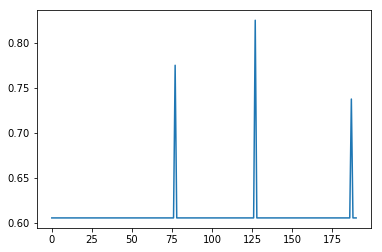

In [20]:
plt.plot(YA_pred)

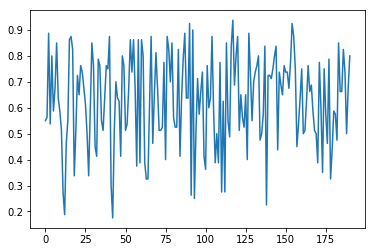

In [21]:
plt.plot(YA_test)

In [24]:
r2_score(YA_test, YA_pred)

0.003939775331289419

In [31]:
# Lets do grid search on C and gamma
est = gs.GridSearchCV(SVR(kernel='rbf',verbose=True),                                              
                      {'C': np.logspace(-3., 3., 10),
                       'gamma': np.logspace(-3., 3., 10)})

In [32]:
YA_pred = est.fit(X_train, YA_train).predict(X_test)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(YA_test, YA_pred))
print(r2_score(YA_test, YA_pred))

0.0301411858017
0.0138886014744


In [34]:
# GPR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as CK

# Instantiate a Gaussian Process model
kernel = CK(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # Kernels
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, YA_train)                                                                

# Make the prediction on the meshed x-axis
YA_pred_GP, sigma = gp.predict(X_test, return_std=True)

from sklearn.metrics import mean_squared_error, r2_score
print('GPR MSE:',mean_squared_error(YA_test, YA_pred_GP))
print('GPR R2:',r2_score(YA_test, YA_pred_GP))

('GPR MSE:', 0.41697803167329828)
('GPR R2:', -12.642024327553845)


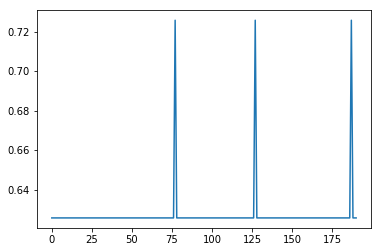

In [35]:
plt.plot(YA_pred)

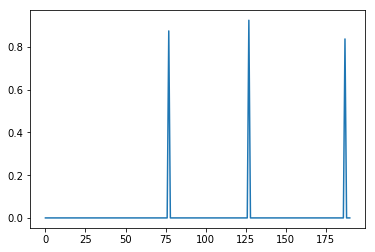

In [36]:
plt.plot(YA_pred_GP)

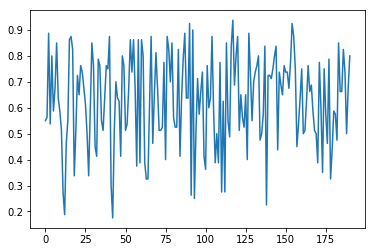

In [37]:
plt.plot(YA_test)